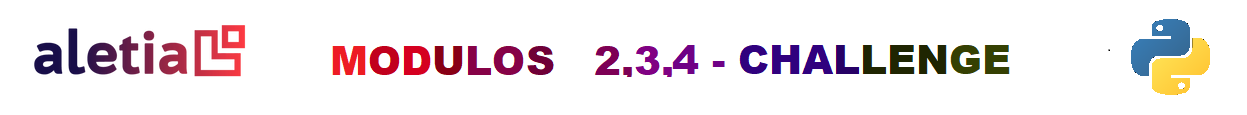

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Reto sobre overfitting & underfitting

Aproximar la función:

$Y = cos(1.5\pi X)$ - - - - - - - - - - - - - - - - ${}_{ecuación} {}_{1}$

utilizando una **regresión lineal** y con solo 30 observaciones de esta función

**Pregunta 1:** ¿Cuales son las principales complicaciones de este planteamiento?

In [3]:
# Escribe tu respuesta a la pregunta 1 en esta celda de código:
'''
Aqui tu respuesta
El problema viene con con uno de los supuestos detrás del modelo de regresión lineal es que los residuales no tienen autocorrelación seriál. 
Una serie está autocorrelacionada cuando tiene correlación con su serie rezagada.
Una regresion lineal no seria una aproximacion adecuada a una funcion coseno.
'''

'\nAqui tu respuesta\nEl problema viene con con uno de los supuestos detrás del modelo de regresión lineal es que los residuales no tienen autocorrelación seriál. \nUna serie está autocorrelacionada cuando tiene correlación con su serie rezagada.\nUna regresion lineal no seria una aproximacion adecuada a una funcion coseno.\n'

Generemos 30 datos a partir de la función planteada en la ecuación 1

Adicionalmente para complicarle un poco el trabajo al modelo agreguemos un poco de ruido

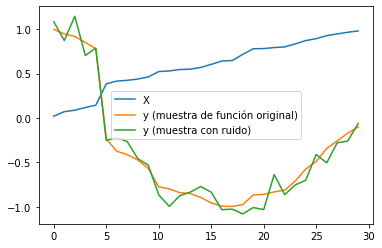

In [4]:
np.random.seed(0)
n_samples = 30

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))
y_sin_ruido = true_fun(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, label='X')
plt.plot(y_sin_ruido, label='y (muestra de función original)')
plt.plot(y, label='y (muestra con ruido)')
plt.legend();

Recordando el planteamiento de la regresión lineal, intentaremos estimar $y$ a partir de $X$, es decir: $\hat{y}=\theta^TX$

Sin embargo la respuesta de la pregunta 1 nos lleva a la conclusión de que no es posible estimar $y$ a partir de $x$ con una regresión lineal.

Pero en el análisis de datos existen algunos artilugios matemáticos para solucionar este tipo de problemas.

Lo que haremos es cambiar el planteamiento.
Además de usar $X$ usaremos algunas transformaciones no lineales de $X$ y las usaremos como features adicionales.

Por ejemplo: $X^2$, $X^3$, $X^4$, $...$, $X^n$ (transformaciones polinomiales)

Los ejemplos anteriores son transformaciones polinomiales de grado 2, 3, 4, ..., n

Y esto nos lleva a...

**Pregunta 2**: ¿Cuántos grados son necesarios?

In [5]:
# Escribe tu respuesta a la pregunta 2 en esta celda de código:
'''
Aqui tu respuesta
La elección del grado del polinomio y el parámetros se deben hacer
con cuidado, buscando modelos que tengan bajo sesgo y baja
varianza para no caer en el sobreajuste o el subajuste.
Para ello algunas de las tecnicas usadas son la separación en datos de testeo y entrenamiento
o incluso la validación cruzada etc.
'''

'\nAqui tu respuesta\nLa elección del grado del polinomio y el parámetros se deben hacer\ncon cuidado, buscando modelos que tengan bajo sesgo y baja\nvarianza para no caer en el sobreajuste o el subajuste.\nPara ello algunas de las tecnicas usadas son la separación en datos de testeo y entrenamiento\no incluso la validación cruzada etc.\n'

A continuación te mostramos una manera de usar [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) para explorar hiperparámetros.

Los pipelines son muy útiles al momento de explorar hiperparámetros (en este caso el hiperparámetro que estamos explorando es el máximo grado de libertad en la transformación de la variable $X$ necesario para estimar $y$)

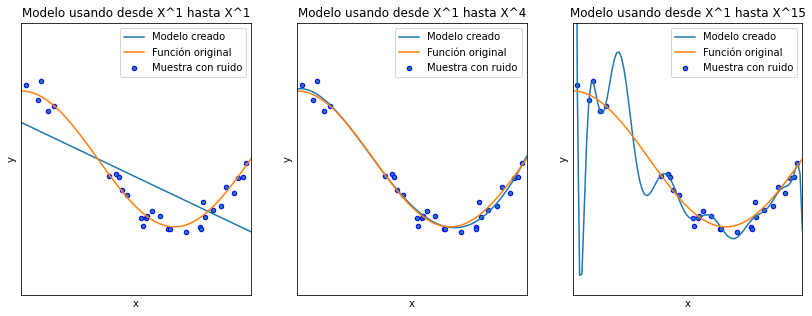

In [6]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression),])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo creado")
    plt.plot(X_test, true_fun(X_test), label="Función original")
    plt.scatter(X, y, edgecolor="b", s=20, label="Muestra con ruido")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Modelo usando desde X^1 hasta X^{}".format(degrees[i]))
plt.show()

En las 3 gráficas anteriores se hacen evidentes los conceptos de *underfitting*, *correct fit* y *overfitting* transformando $X$ desde el grado 1 hasta los grados 1, 4, 15 respectivamente.

Estos números con el máximo grado fueron determinados al **tanteo** probando desde 1 hasta 15 y este es un procedimiento válido para encontrar el fit correcto.

Sin embargo tiene dos desventajas muy importantes:
1. Es necesario ver la gráfica para determinar si el fit es el correcto (esto no es posible cuando la dimensión de X es mayor a 1).
2. Pierde la posibilidad de ser automatizado.

Si respondiste la pregunta 2, sabrás que poder calcular el error con cada hiperparámetro probado te da la posibilidad de saber cual de los hiperparámetros minimiza el error.

Además es importante mirar no solo el error en el set de entrenamiento, sino también en el de prueba. A continuación te mostramos la tan famosa gráfica de ***bias*** vs ***variance***:

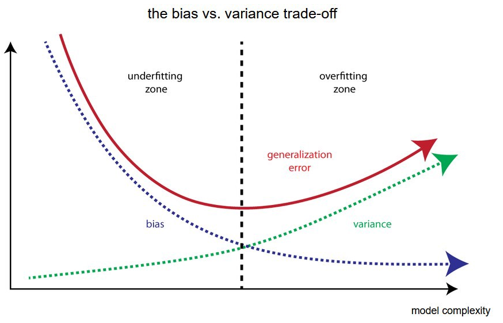

**Pregunta 3:** ¿Como podemos modificar el código anterior para incluir el cálculo del error y sistematizar la selección del grado máximo polinomial en la transformación de $X$?

In [20]:
# Escribe tu respuesta a la pregunta 3 en esta celda de código:
'''
Yo usaria el metodo de rejilla para hallar de manera directa el grado del polinomio
'''

polynomial_features = PolynomialFeatures()
linear_regression = Ridge() #O podemos seguir usando linearRegression()
poly_model= Pipeline(steps=[("poly", polynomial_features), ("regress",linear_regression)])

#Los parámetros de pipeline se pueden establecer usando nombres de parámetros 
#separados por '__' para realizar la optimización de hiperparámetros (param_grid).
param_grid = {"poly__degree": [2,3,4], "regress__alpha": np.logspace(-2,2,5)}

busqueda = GridSearchCV(poly_model, param_grid, cv=5, scoring='explained_variance')

busqueda.fit(X.reshape(-1,1), y)
#Podemos visualizar todas las posibles combinaciones (busqueda.cv_results_) y buscar a mano la mejor opcion
#U obtenerla directa como sigue:

busqueda.best_params_


{'poly__degree': 4, 'regress__alpha': 0.01}

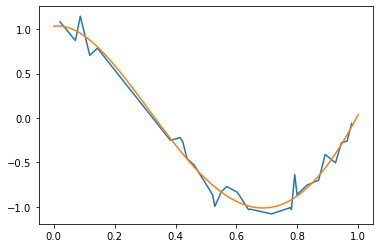

In [29]:
#Hacemos la eleccion del polinomio de grado 4
modelo_final= Pipeline(steps=[("poly", PolynomialFeatures(degree=4)), ("regress",LinearRegression())])
modelo_final.fit(X.reshape(-1,1), y)

x_test = np.linspace(0,1,100)

plt.plot(X,y, label='Funcion real')
plt.plot(X_test, modelo_final.predict(X_test.reshape(-1,1)), label='Modelo usado');

**Pregunta 4:** ¿Cuales son otros hiperparámetros que incrementan la complejidad de los modelos? en el caso de:
- Regresión logística
- Árboles de decisión
- K-medias
- Redes neuronales

In [30]:
# Escribe tu respuesta a la pregunta 4 en esta celda de código:
'''
Al entrenar un modelo de aprendizaje automático se fijan los valores de los hiperparámetros para que con estos se obtengan los parámetros. 
Algunos ejemplos de hiperparámetros utilizados para entrenar los modelos son:

La ratio de aprendizaje en el algoritmo del descenso del gradiente.
El número de vecinos en k-vecinos más cercanos (k-nn).
La profundidad máxima en un árbol de decisión
'''

'\nAl entrenar un modelo de aprendizaje automático se fijan los valores de los hiperparámetros para que con estos se obtengan los parámetros. \nAlgunos ejemplos de hiperparámetros utilizados para entrenar los modelos son:\n\nLa ratio de aprendizaje en el algoritmo del descenso del gradiente.\nEl número de vecinos en k-vecinos más cercanos (k-nn).\nLa profundidad máxima en un árbol de decisión\n'

## Reto sobre *end-to-end machine learning model*

El objetivo principal de esta parte del reto es **dimensionar la importancia de cada parte del proceso de creación de un modelo**.

**Paso 1:** Seleccióna el reto. A continuación te presentamos 10 posibles retos a resolver:
1. [Mortalidad cancer 1](https://data.world/nrippner/cancer-linear-regression-model-tutorial)
2. [Factor de riesgo de salud](https://www.telusinternational.com/articles/10-open-datasets-for-linear-regression#:~:text=CDC%20data%3A%20nutrition%2C%20physical%20activity%2C%20obesity)
3. [Industria pesquera](https://www.kaggle.com/aungpyaeap/fish-market)
4. [Precios de seguros médicos](https://www.kaggle.com/mirichoi0218/insurance)
5. [Mercado de valores de Nueva York](https://)
6. [Mortalidad cancer 2](https://)
7. [Precios de casas](https://)
8. [Calidad del vino](https://)
9. [Precios de automóviles](https://)
10. [Esperanza de vida](https://)

**Mas información sobre los datasets:**

1. Regresión lineal del cáncer

Este conjunto de datos incluye datos tomados de cancer.gov sobre muertes por cáncer en los Estados Unidos. Junto con el conjunto de datos, el autor incluye un recorrido completo sobre cómo obtuvieron y prepararon los datos, su análisis exploratorio, selección de modelos, diagnóstico e interpretación.

2. Datos de los CDC: nutrición, actividad física, obesidad

Del Sistema de Vigilancia de Factores de Riesgo del Comportamiento de los CDC, este conjunto de datos incluye información sobre la actividad física, el peso y la dieta promedio de un adulto.

3. Conjunto de datos del mercado de pescado para la regresión

Creado para la regresión lineal múltiple y el análisis multivariado, el conjunto de datos del mercado de pescado contiene información sobre las especies de pescado comunes en las ventas del mercado. El conjunto de datos incluye las especies de peces, el peso, la longitud, la altura y el ancho.

4. Costos del seguro médico

Este conjunto de datos se inspiró en el libro Machine Learning with R de Brett Lantz. Los datos contienen información médica y costos facturados por las compañías de seguros de salud. Contiene 1338 filas de datos y las siguientes columnas: edad, sexo, IMC, niños, fumador, región y cargos del seguro.

5. Conjunto de datos de la Bolsa de Valores de Nueva York

Creado como un recurso para el análisis técnico, este conjunto de datos contiene datos históricos del mercado de valores de Nueva York. El conjunto de datos viene en cuatro archivos CSV: precios, precios ajustados por división, valores y fundamentos. Con estos datos, puede experimentar con modelos predictivos, regresión lineal móvil y más.

6. Desafío de regresión OLS

El desafío de regresión OLS le asigna la tarea de predecir las tasas de mortalidad por cáncer en los condados de EE. UU. El conjunto de datos contiene datos de cancer.gov, Clinicaltrials.gov y la Encuesta sobre la comunidad estadounidense. Está en formato CSV e incluye la siguiente información sobre el cáncer en los EE. UU.: tasas de mortalidad, casos informados, nombre del condado de EE. UU., ingresos por condado, población, datos demográficos y más.

7. Predicción de precios inmobiliarios

Este conjunto de datos inmobiliarios se creó para análisis de regresión, regresión lineal, regresión múltiple y modelos de predicción. Incluye la fecha de compra, la edad de la casa, la ubicación, la distancia a la estación MRT más cercana y el precio de la casa por unidad de área.

8. Calidad del vino tinto

Desde el repositorio de aprendizaje automático de UCI, este conjunto de datos se puede usar para tareas de clasificación y modelado de regresión. El conjunto de datos incluye información sobre las propiedades químicas de los diferentes tipos de vino y cómo se relacionan con la calidad general.

9. Conjunto de datos del vehículo de CarDekho

Un conjunto de datos útil para la predicción de precios, este conjunto de datos de vehículos incluye información sobre automóviles y motocicletas que figuran en CarDekho.com. Los datos están en un archivo CSV que incluye las siguientes columnas: modelo, año, precio de venta, precio de exposición, kilómetros recorridos, tipo de combustible, tipo de vendedor, transmisión y número de propietarios anteriores.

10. Estadísticas de la OMS sobre esperanza de vida

Este conjunto de datos contiene información compilada por la Organización Mundial de la Salud y las Naciones Unidas para rastrear los factores que afectan la esperanza de vida. Los datos contienen 2938 filas y 22 columnas. Las columnas incluyen: país, año, estado de desarrollo, mortalidad de adultos, esperanza de vida, muertes infantiles, consumo de alcohol per cápita, gasto del país en salud, cobertura de inmunización, IMC, muertes de menores de 5 años, muertes por VIH/SIDA, PIB, población, condición corporal, información sobre ingresos y educación.

**Paso 2:** Consigue los datos e importalos a un dataframe llamado **df**

In [32]:
# Escribe aquí tu código
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Diccionario de datos

Variables

Species : Fish species


Weight : Weight of fish (gram)


Length1 : Vertical Lenght of fish (cm)


Length2 : Diagonal Lenght of fish (cm)


Length3 : Cross Lenght of fish (cm)


Height : Height of fish (cm)


Width : Width of fish (cm)

**NOTA:** DE AQUÍ EN ADELANTE (EN CADA PASO) DEBERÁS INCLUIR UN PEDAZO DE CÓDIGO PARA SEPARAR TU DATASET EN ENTRENAMIENTO Y PRUEBA. EL SCORE CALCULADO DEBERÁ SER DEL SET DE PRUEBA

**Paso 3:** Selecciona algunos features al azar y crea una regresión lineal, luego calcula el score para conocer el performance del modelo

In [53]:
# Escribe aquí tu código

target = ['Weight']

ls_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

x = df[ls_features]
y = df[target]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_1 = reg.score(x_test, y_test)
print('score_1:',score_1)

score_1: 0.8632643733814437


**Paso 4:** Realiza un análisis exploratorio, luego realiza el trabajo que ya conoces de limpieza, imputación de valores en los vacíos, eliminación de outliers, etc. Finalmente elije las mismas variables que usaste en el paso 3 (ya limpias) y vuelve a crear un modelo de regresión lineal calculando su score.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


No hay nulos por llenar

In [39]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [40]:
especies = df["Species"].value_counts()
especies


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

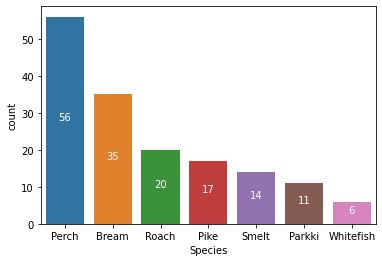

In [45]:
bar_graph = sns.countplot(data = df, x= df["Species"], order = df["Species"].value_counts().index);

for i in range(len(especies)):
    
    bar_graph.text(i, especies[i]/2, str(especies[i]), color ="white", horizontalalignment = "center")

## Outliers

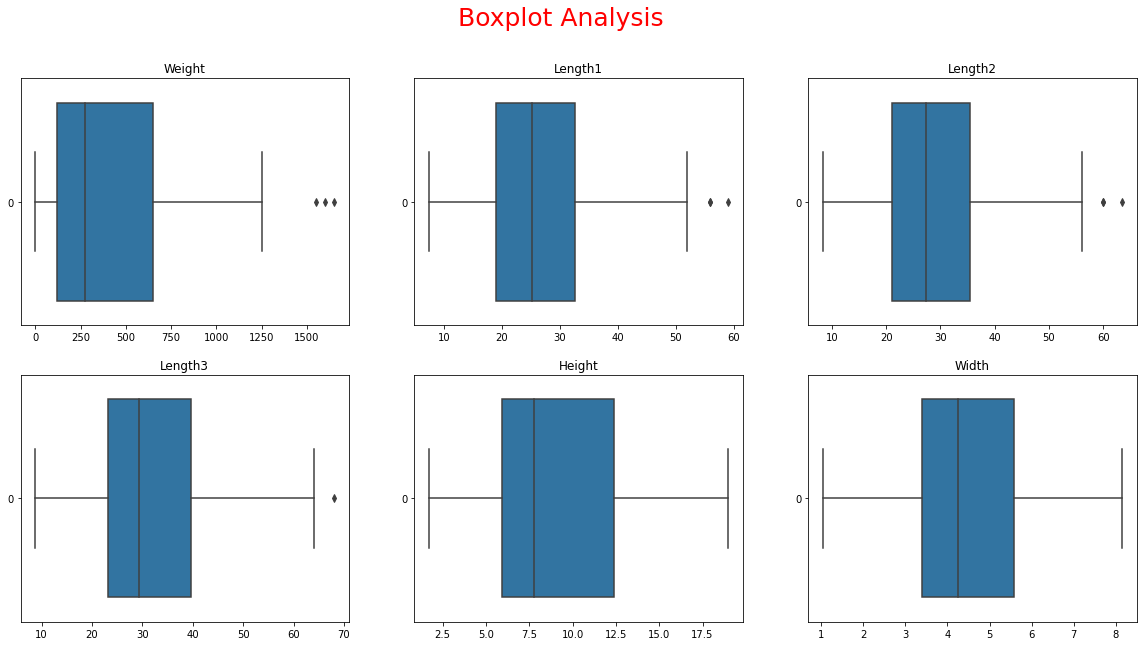

In [54]:
num_cols = df.select_dtypes(include="number").columns

fig, axes = plt.subplots(2,3,figsize=(20,10))

fig.suptitle('Boxplot Analysis', fontsize=25, color = "red")

axes = axes.ravel()

for i,col in enumerate(num_cols):
    
    axes[i].set_title(col)
    
    box = sns.boxplot(data=df[col], ax=axes[i], orient = "h")

In [58]:
#Eliminamos los outliers haciendo uso del test de turkey

def test_turkey(dataframe, col_name, low_perc = 0.25, up_perc = 0.75):

    lower = np.quantile(dataframe[col_name], low_perc)
    upper = np.quantile(dataframe[col_name], up_perc)
    iqr = upper - lower

    low_threshold = lower - 1.5*iqr
    up_threshold  = upper + 1.5*iqr

    df.loc[(dataframe[col_name] < low_threshold), col_name] = low_threshold
    df.loc[(dataframe[col_name] > up_threshold),  col_name] = up_threshold
    
    return dataframe

columnas = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']
for i in columnas:
    
     test_turkey(df, i)

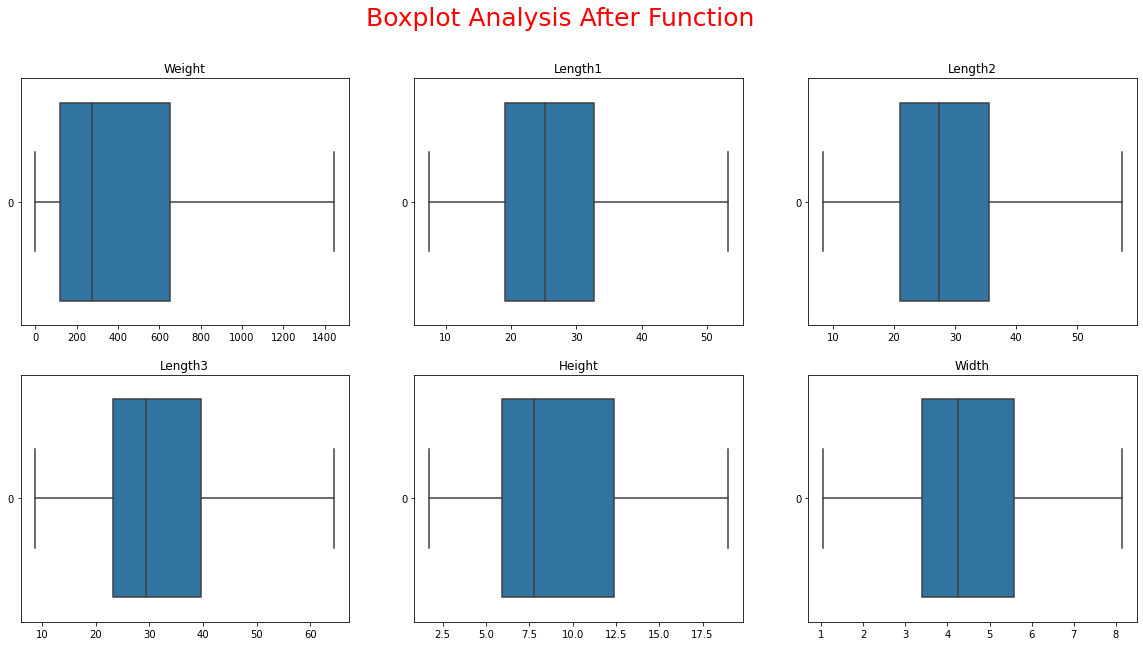

In [59]:
# boxplot check

fig, axes = plt.subplots(2,3,figsize=(20,10))

fig.suptitle('Boxplot Analysis After Function', fontsize=25, color = "red")

axes = axes.ravel()

for i,col in enumerate(num_cols):
    
    sns.boxplot(data=df[col], ax=axes[i], orient = "h")
    
    axes[i].set_title(col) 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [67]:
# Escribe aquí tu código

target = ['Weight']

ls_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']

x = df[ls_features]
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_2 = reg.score(x_test, y_test)
print('score_2:',score_2)

score_2: 0.8741397379015619


**Paso 5:** Crea nuevas variables y transforma las ya existentes si es necesario y selecciona las variables mas reelevantes con alguna técnica de selección de variables. Luego crea nuevamente un modelo de regresión lineal calculando su score.

## Correlacion

In [61]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.911859,0.915150,0.922441,0.741635,0.898874
Length1,0.911859,1.000000,0.999503,0.991943,0.636902,0.875426
Length2,0.915150,0.999503,1.000000,0.993990,0.651566,0.881426
Length3,0.922441,0.991943,0.993990,1.000000,0.706758,0.880175
Height,0.741635,0.636902,0.651566,0.706758,1.000000,0.792881
Width,0.898874,0.875426,0.881426,0.880175,0.792881,1.000000


<AxesSubplot:>

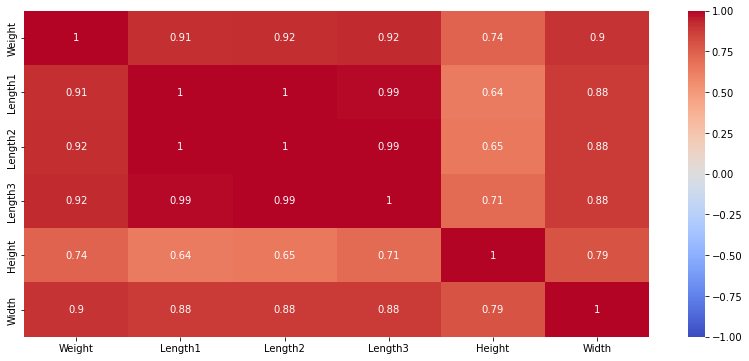

In [65]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True, vmin=-1)

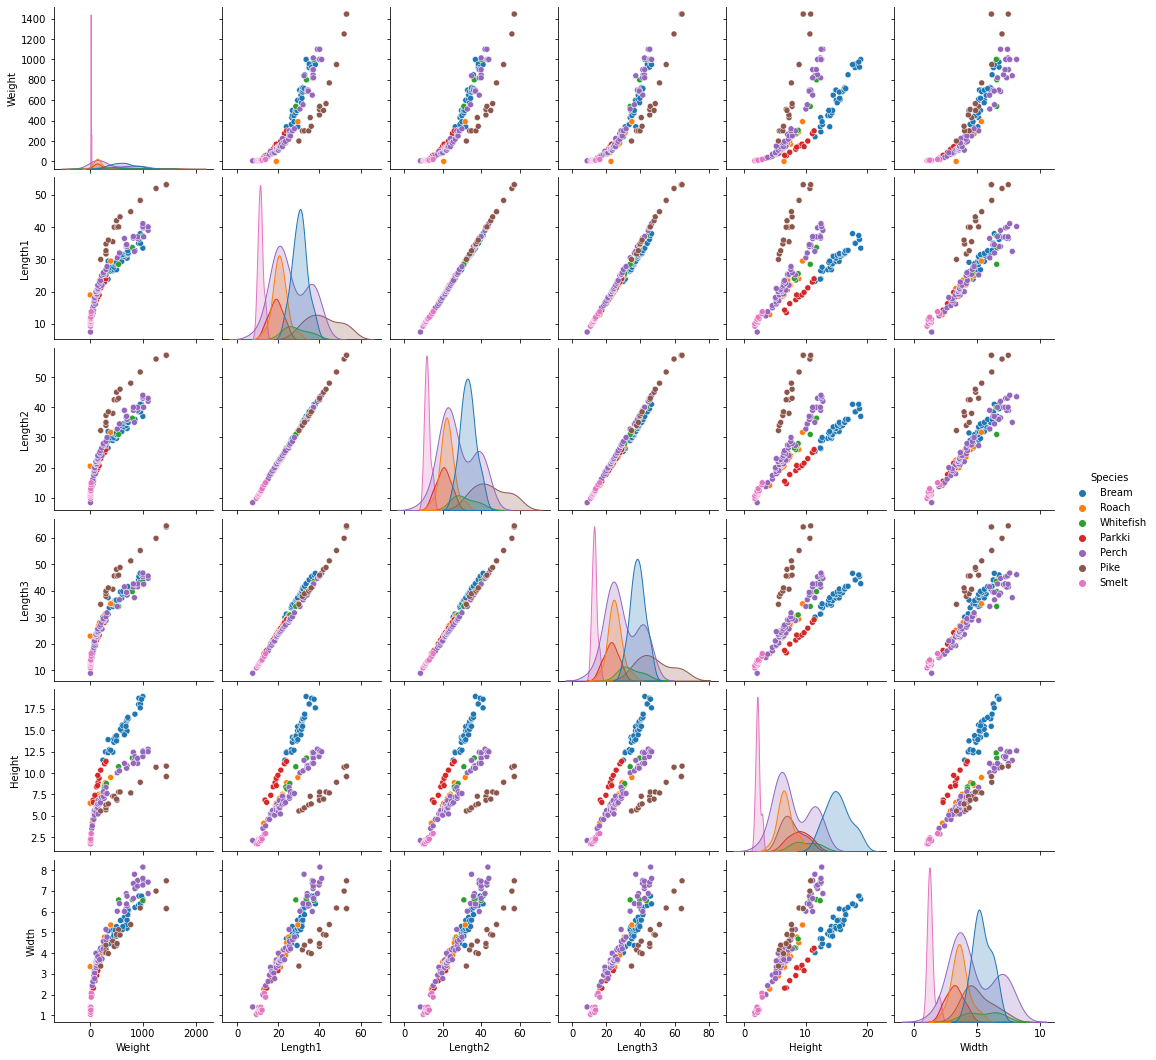

In [66]:
sns.pairplot(df, hue="Species");

In [ ]:
print(df.eq(0).sum())

In [68]:
# zero value
df.drop(df[df["Weight"] == 0].index, inplace=True)

In [69]:
# multicollinearty entre length1, length2 y length3, asi que eliminaremos dos de ellas

In [70]:
# Escribe aquí tu código
target = ['Weight']

ls_features = ['Length1', 'Height', 'Width']

x = df[ls_features]
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_3 = reg.score(x_test, y_test)
print('score_3:',score_3)

score_3: 0.8251875988886658


**Paso 6:** Determina si es necesario darle complejidad a las variables realizando transformaciones no lineales. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [71]:
df = pd.get_dummies(df, columns=["Species"])
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [72]:
# Escribe aquí tu código
target = ['Weight']

x = df.drop("Weight", axis = 1)
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_4 = reg.score(x_test, y_test)
print('score_4:',score_4)

score_4: 0.9167669306413696


**Paso 7:** Realiza un procedimiento de reducción de la dimensionalidad. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [ ]:
#No es necesario un procesamiento complejo, asi que definiremos una nueva variable volumen en funcion de otras 3

In [73]:
df["Volume"] = df["Width"]*df["Height"]*df["Length1"]
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Volume
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0,1074.401280
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0,1289.613312
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0,1389.244539
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0,1491.696944
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0,1693.018644


In [74]:
# Escribe aquí tu código

target = ['Weight']

x = df.drop("Weight", axis = 1)
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(x , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_5 = reg.score(x_test, y_test)
print('score_5:',score_5)

score_5: 0.9416401424523246


**Paso 8:** Realiza un procedimiento de escalamiento en tus variables. Luego vuelve a crear un modelo de regresión lineal calculando su score.

In [80]:
df.head()

,Weight,Length1,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Volume
0,242.0,23.2,11.5200,4.0200,1,0,0,0,0,0,0,1074.401280
1,290.0,24.0,12.4800,4.3056,1,0,0,0,0,0,0,1289.613312
2,340.0,23.9,12.3778,4.6961,1,0,0,0,0,0,0,1389.244539
3,363.0,26.3,12.7300,4.4555,1,0,0,0,0,0,0,1491.696944
4,430.0,26.5,12.4440,5.1340,1,0,0,0,0,0,0,1693.018644


In [79]:
# Escribe aquí tu código

target = ['Weight']

x = df.drop("Weight", axis = 1)
y = df[target]

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
    
x_scaled = scaler.fit_transform(x) 

x_train,x_test,y_train,y_test = train_test_split(x_scaled , y, test_size=.20, random_state=0)

reg = LinearRegression()

reg.fit(x_train,y_train)

y_pred = reg.predict(x_test)

score_6 = reg.score(x_test, y_test)
print('score_6:',score_6)

score_6: 0.9191543298480945


**Paso 9:** Grafica los 6 scores calculados

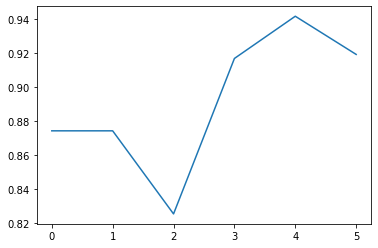

In [81]:
ls_scores = [score_1, score_2, score_3, score_4, score_5, score_6]
plt.plot(ls_scores);

# La gráfica debe verse mas o menos así:

Escribe tus conclusiones sobre el paso 9

In [ ]:
# Escribe aquí tus conclusiones
"""
Cada paso en este ejemplo es de suma importancia, sin embargo dependiendo del dataset no todos los pasos son necesarios
o incluso no todos mejorar a nuestro modelo, pudiera ser lo contrario.

Dependiendo del objetivo que tengamos es el como hay que manipular los datos y queda a nuestro criterio que pasos 
y herramientas utilizar o no para obtener un resultado optimo.

Lo ideal es que con cada modificacion que creamos pertinente nuestro modelo sufra cambios para bien.

"""